
# Data Aggregation and Group Operations

- Compute group statistics
- Create pivot tables
- Slice and dice
- grouped operations
- Cross tabulate

### groupby Mechanics

coined the "split-apply-combine" method. 

1) Data in a Series or df is split into groups based on 1+ keys provided and on a particular axis of an object
2) A function is applied to each group producing a new value
3) The results of all those function appilcations are combined into a result object. 

Each group key can take many forms and the keys do not have to be all of the same type (numbers, text, etc). They can be a list, array, or a variable indicating a column name in a df, dict, series, function. 

In [318]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [319]:
df = DataFrame({'key1': ['a','a','b','b','a'],
               'key2': ['one','two','one','two','one'],
               'data1': np.random.randn(5),
               'data2': np.random.randn(5)})

df

,data1,data2,key1,key2
0,-0.441451,0.723205,a,one
1,-0.389119,-0.584934,a,two
2,-0.789676,-0.343874,b,one
3,0.282090,-1.911356,b,two
4,-0.157088,-0.021105,a,one


In [320]:
# Ex: Compute the mean of data1 column using the groups labels from key1

#Create a groupby object
grouped = df['data1'].groupby(df['key1'])
print grouped

# Apply mean() operation to each of the groups on the groupby object
grouped.mean()

# A new series is created  indexed by the unique values of key1 column

key1
a   -0.329219
b   -0.253793
Name: data1, dtype: float64

In [321]:
# Ex: Compute the mean of data1 grouped by key1, key2

means = df['data1'].groupby([df['key1'],df['key2']]).mean()   # Notice the df and column needs to be qualified in a list

print means

# Unstack

means.unstack()

key1  key2
a     one    -0.299269
      two    -0.389119
b     one    -0.789676
      two     0.282090
Name: data1, dtype: float64


key2,one,two
key1,,
a,-0.299269,-0.389119
b,-0.789676,0.282090


In [322]:
# We can also group by any arrays as long as they are the right length

states=np.array(['Ohio','Ohio','California','California','Ohio'])

years=np.array([2005,2006,2005,2006,2005])

df['data1'].groupby([states,years]).mean()

California  2005   -0.789676
            2006    0.282090
Ohio        2005   -0.299269
            2006   -0.389119
Name: data1, dtype: float64

In [323]:
# Pass columns names as group keys

df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.329219,0.039055
b,-0.253793,-1.127615


In [324]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one  -0.299269  0.351050
     two  -0.389119 -0.584934
b    one  -0.789676 -0.343874
     two   0.282090 -1.911356

In [325]:
# Get counts of group sizes using size()

df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

#### Iterating Over Groups

groupby object supports iteration, generating a sequence of 2-tuples containing hte group name along with the chunk of dat.a 

In [326]:
df.groupby(df['key1']).size()

key1
a    3
b    2
dtype: int64

In [327]:
for name, group in df.groupby('key1'):
    print(name)
    print''
    print(group)
    print''

a

      data1     data2 key1 key2
0 -0.441451  0.723205    a  one
1 -0.389119 -0.584934    a  two
4 -0.157088 -0.021105    a  one

b

      data1     data2 key1 key2
2 -0.789676 -0.343874    b  one
3  0.282090 -1.911356    b  two



In the case of multiple keys, the 1st element in the tuple will be a tuple of key values:

In [328]:
for (k1, k2), group in df.groupby(['key1','key2']):
    print "(k1, k2): {}".format((k1,k2))  # Key combinations
    print "group: \n{}".format(group) # results from key combinations

(k1, k2): ('a', 'one')
group: 
      data1     data2 key1 key2
0 -0.441451  0.723205    a  one
4 -0.157088 -0.021105    a  one
(k1, k2): ('a', 'two')
group: 
      data1     data2 key1 key2
1 -0.389119 -0.584934    a  two
(k1, k2): ('b', 'one')
group: 
      data1     data2 key1 key2
2 -0.789676 -0.343874    b  one
(k1, k2): ('b', 'two')
group: 
     data1     data2 key1 key2
3  0.28209 -1.911356    b  two


In [329]:
# Compute a dict of the data pieces as a one-liner

pieces=dict(list(df.groupby('key1')))
print pieces
print''
print pieces['a']

{'a':       data1     data2 key1 key2
0 -0.441451  0.723205    a  one
1 -0.389119 -0.584934    a  two
4 -0.157088 -0.021105    a  one, 'b':       data1     data2 key1 key2
2 -0.789676 -0.343874    b  one
3  0.282090 -1.911356    b  two}

      data1     data2 key1 key2
0 -0.441451  0.723205    a  one
1 -0.389119 -0.584934    a  two
4 -0.157088 -0.021105    a  one


By default, `groupby` groups on axis=0, but we can also group on any of the other axes. For example, we can group the columns of our example df here by dtype:

In [330]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [331]:
grouped = df.groupby(df.dtypes, axis=1)

tbl = dict(list(grouped))
tbl

{dtype('float64'):       data1     data2
 0 -0.441451  0.723205
 1 -0.389119 -0.584934
 2 -0.789676 -0.343874
 3  0.282090 -1.911356
 4 -0.157088 -0.021105, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### Selecting a Column or Subset of Columns

Indexing a Groupby object created from a df with a column name or array of column names has the effect of selecting those columns for aggregation. 

In [332]:

df.groupby('key1')['data1']
df['data1'].groupby(df['key1']) # Equivalent


df.groupby('key1')[['data2']] # Equivalent
df['data2'].groupby(df['key1'])

Especially for large data sets, it may be desirable to aggregate only a few columns. For example, in the above data set, to  compute means for just data2 column and get the result as a df:

In [333]:
df.groupby(['key1','key2'])[['data2']].mean()
df[['data2']].groupby([df['key1'],df['key2']]).mean()  
# equivalent, the groupby elements need to be in a list no matter the objects

data2
key1 key2          
a    one   0.351050
     two  -0.584934
b    one  -0.343874
     two  -1.911356

In [334]:
# Select 2 value columns
df[['data1','data2']].groupby([df['key1'],df['key2']]).mean()  # grouped df since an array is passed

data1     data2
key1 key2                    
a    one  -0.299269  0.351050
     two  -0.389119 -0.584934
b    one  -0.789676 -0.343874
     two   0.282090 -1.911356

The object returned by this indexing operation is a grouped DataFrame if a list or array is passed. 

A grouped Series is just a single column name that is passed as a scalar:

In [335]:
s_grouped = df.groupby(['key1','key2'])[['data2']]

s_grouped

In [336]:
s_grouped.mean()

data2
key1 key2          
a    one   0.351050
     two  -0.584934
b    one  -0.343874
     two  -1.911356

### Grouping with Dicts and Series

Grouping info may exist in a form other than an array. Let's consider another example df:

In [337]:
people = DataFrame(np.random.randn(5,5),
                   columns=['a','b','c','d','e'],
                   index=['Becky','Wil','Jeanie','Lavy','Janice'])

people.loc[2:3,['b','c']] = np.nan #add NA values at row 2

people

,a,b,c,d,e
Becky,0.511481,-0.546505,1.735222,-0.082334,0.650640
Wil,0.848649,-1.705239,1.352547,0.127966,-0.396424
Jeanie,0.794742,NaN,NaN,-0.072836,-0.319566
Lavy,-0.270522,-0.329928,-0.125353,-0.186005,0.408030
Janice,-0.711169,1.057901,-0.000213,-0.207018,-0.343058


Suppose I have a group correspondence for the columns and want to sum together the columns by group:

In [338]:
mapping = {'a': 'red',
           'b': 'red',
           'c':'blue',
           'd': 'blue',
           'e': 'red',
           'f': 'orange'}

by_column = people.groupby(mapping, axis=1)
by_column.sum()

# orange doesn't show up since we don't have 'f' keys

,blue,red
Becky,1.652888,0.615617
Wil,1.480514,-1.253013
Jeanie,-0.072836,0.475176
Lavy,-0.311359,-0.192420
Janice,-0.207231,0.003674


You can also apply a series to group by mapping:

In [339]:
map_series = Series(mapping)

print map_series

people.groupby(map_series, axis=1).count()

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object


,blue,red
Becky,2,3
Wil,2,3
Jeanie,1,2
Lavy,2,3
Janice,2,3


### Grouping with Functions

Any function passed as a group key will be called once per index, with the return values being used as the group names. 

Ex: Consider df which has people's first names as index values. Suppose we want to group by the length of the names. We can compute an array of string lengths, but instead we can just pass the len function

In [340]:
people.groupby(len, axis=0).sum()

# 3, 4, 5, 6 are the length of the first names above

,a,b,c,d,e
3,0.848649,-1.705239,1.352547,0.127966,-0.396424
4,-0.270522,-0.329928,-0.125353,-0.186005,0.408030
5,0.511481,-0.546505,1.735222,-0.082334,0.650640
6,0.083573,1.057901,-0.000213,-0.279854,-0.662624


Mixing functions with arrays, dicts, or Series is not a problam since everything gets converted to arrays internally

In [341]:
key_list = ['one', 'one','one','two','two']

people.groupby([len, key_list]).sum()

a         b         c         d         e
3 one  0.848649 -1.705239  1.352547  0.127966 -0.396424
4 two -0.270522 -0.329928 -0.125353 -0.186005  0.408030
5 one  0.511481 -0.546505  1.735222 -0.082334  0.650640
6 one  0.794742       NaN       NaN -0.072836 -0.319566
  two -0.711169  1.057901 -0.000213 -0.207018 -0.343058

### Grouping by Index Levels

We can also use one of the levels of an axis index to aggregate. To do this, pass the level # or name using the `level` keyword

In [342]:
columns=pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],
                                    [1,3,5,1,3]], names = ['city','tenor'])

columns

# MultiIndex assigned 1,3,5 to US and 1,3 to JP

MultiIndex(levels=[[u'JP', u'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=[u'city', u'tenor'])

In [343]:
hier_df = DataFrame(np.random.randn(4,5), columns = columns)
hier_df

city         US                            JP          
tenor         1         3         5         1         3
0      0.698692 -0.286615 -1.536954 -1.111492 -0.573638
1     -0.470049 -0.065074  0.616042  0.316071 -0.405254
2     -0.846026 -0.635208 -0.107253  2.361183  1.838306
3     -0.301043  1.924544  0.838420  1.385886  0.634160

In [344]:
hier_df.groupby(level='city', axis =1).count() #city is along axis 1

city,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


### Data Aggregation

Refers to any data transformation that produces scalar values from arrays such as `mean, count, min, sum,` etc... We can indirectly call upon Series methods for aggregation. For example, `quantile` computes sample quantiles of a series for a DataFrame's columns. We can call upon this method on a GroupBy object since it's a series method. GroupBy slices up the Series internally, calls piece.quantile(0.9) then assembles those results together with the resulting object. 

In [345]:
df

,data1,data2,key1,key2
0,-0.441451,0.723205,a,one
1,-0.389119,-0.584934,a,two
2,-0.789676,-0.343874,b,one
3,0.282090,-1.911356,b,two
4,-0.157088,-0.021105,a,one


In [346]:
grouped = df.groupby(['key1'])

grouped[['data1', 'data2']].quantile(0.9) #Returns 90th percentile for a nad b across both data1 and data2

0.9,data1,data2
key1,,
a,-0.203494,0.574343
b,0.174914,-0.500622


We can also pass our own customized functions via `agg` or `aggregate` method on the GroupBy object:

In [347]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.284362,1.308139
b,1.071766,1.567482


In [348]:
# can describe a groupby object as well

grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.329219  0.151349 -0.441451 -0.415285 -0.389119 -0.273104   
b      2.0 -0.253793  0.757853 -0.789676 -0.521734 -0.253793  0.014149   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a    -0.157088   3.0  0.039055  0.656141 -0.584934 -0.303020 -0.021105   
b     0.282090   2.0 -1.127615  1.108377 -1.911356 -1.519486 -1.127615   

                          
           75%       max  
key1                      
a     0.351050  0.723205  
b    -0.735745 -0.343874

In [349]:
# std or var

print grouped.std()
print grouped.var()

         data1     data2
key1                    
a     0.151349  0.656141
b     0.757853  1.108377
         data1     data2
key1                    
a     0.022906  0.430522
b     0.574341  1.228500


### Ex: Restaurant Tipping and Advanced Agg Functions 

In [350]:
%cd "C:/users/sonya/documents/python for data analysis/data/ch08"

# read file
tips = pd.read_csv("tips.csv")

# Add tip percentage column of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']

tips

C:\users\sonya\documents\python for data analysis\data\ch08


,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


#### Column-wise and Multiple Function Application

We can aggregate using a different function from `agg`:

In [351]:
grouped = tips.groupby(['sex','smoker'])

grouped_pct = grouped['tip_pct']

grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [352]:
#Equivalent

grouped = tips.groupby(['sex','smoker'])[['tip_pct']].agg('mean')

grouped

tip_pct
sex    smoker          
Female No      0.156921
       Yes     0.182150
Male   No      0.160669
       Yes     0.152771

If we pass a list of functions through `agg` method, we get back a df with column names taken from the functions. Very useful.

In [353]:
grouped_tips = grouped_pct.agg(['mean','std','min','max',peak_to_peak])

grouped_tips

mean       std       min       max  peak_to_peak
sex    smoker                                                      
Female No      0.156921  0.036421  0.056797  0.252672      0.195876
       Yes     0.182150  0.071595  0.056433  0.416667      0.360233
Male   No      0.160669  0.041849  0.071804  0.291990      0.220186
       Yes     0.152771  0.090588  0.035638  0.710345      0.674707

To rename the columns, use a tuple `(name, function)` in the arguments passed

In [354]:
grouped_tips = grouped_pct.agg([('Average','mean'),
                                ('Standard Deviation', np.std),
                                ('minumum',np.min),
                                ('maximum','max'), 
                                ('range', peak_to_peak)])

grouped_tips = grouped

In [355]:
# pass a list of functions to agg method

functions = ['count','mean','max']

grouped = tips.groupby(['sex','smoker'])

results = grouped[['tip_pct','total_bill']].agg(functions)

results

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [356]:
results['tip_pct'][['count']]

count
sex    smoker       
Female No         54
       Yes        33
Male   No         97
       Yes        60

In [357]:
# custom names passed using tuples

functions = [('num of tippers', 'count'),('average tip', 'mean')]

grouped[['tip']].agg(functions)

tip            
              num of tippers average tip
sex    smoker                           
Female No                 54    2.773519
       Yes                33    2.931515
Male   No                 97    3.113402
       Yes                60    3.051167

In [358]:
# pass a dictionary to map functions to column names

grouped.agg({'tip': np.max, 'size': 'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [359]:
# Include hierarchical columns by passing dictionary of lists of functions

grouped.agg({'tip_pct': ['min','max','mean','std'],
             'size' : 'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

#### Return aggregated data in "unindexed" form or repeating rows 

In [360]:
# Use as_index = False parameter in groupby method

tips.groupby(['sex','smoker'], as_index=False).sum()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,977.68,149.77,140,8.473732
1,Female,Yes,593.27,96.74,74,6.010962
2,Male,No,1919.75,302.00,263,15.584865
3,Male,Yes,1337.07,183.07,150,9.166271


In [361]:
tips.reset_index

<bound method DataFrame.reset_index of      total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
5         25.29  4.71    Male     No   Sun  Dinner     4  0.186240
6          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
7         26.88  3.12    Male     No   Sun  Dinner     4  0.116071
8         15.04  1.96    Male     No   Sun  Dinner     2  0.130319
9         14.78  3.23    Male     No   Sun  Dinner     2  0.218539
10        10.27  1.71    Male     No   Sun  Dinner     2  0.166504
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
12        15.42  1.57    Male     No   Sun  Dinner     2  0.101816
13        18.43  3.00  

### Group-wise Operations and Transformations

`transform()` and `apply` methods enable us to do data transformations on Groupby objects:

In [362]:

df

,data1,data2,key1,key2
0,-0.441451,0.723205,a,one
1,-0.389119,-0.584934,a,two
2,-0.789676,-0.343874,b,one
3,0.282090,-1.911356,b,two
4,-0.157088,-0.021105,a,one


In [363]:
# Method 1: Works but is inflexible

k1_means = df.groupby('key1').mean().add_prefix('mean_')
print k1_means

print ''

pd.merge(df, k1_means, left_on ='key1', right_index=True) 

# right_index : boolean, default False... Use the index from the right DataFrame as the join key. Same caveats as left_index

      mean_data1  mean_data2
key1                        
a      -0.329219    0.039055
b      -0.253793   -1.127615



,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.441451,0.723205,a,one,-0.329219,0.039055
1,-0.389119,-0.584934,a,two,-0.329219,0.039055
4,-0.157088,-0.021105,a,one,-0.329219,0.039055
2,-0.789676,-0.343874,b,one,-0.253793,-1.127615
3,0.282090,-1.911356,b,two,-0.253793,-1.127615


In [364]:
# Method 2: Using Transform - the passed function must produce a scalar value to be broadcasted or a transformed array same size

def demean(arr):
    return arr -arr.mean()

demeaned = people.groupby(key).transform(demean)

print demeaned

print demeaned.groupby(key).mean()

               a         b         c         d         e
Becky   0.313130 -0.802203  0.867718  0.038395  0.654635
Wil     0.559586 -0.687656  0.738950  0.156986 -0.402227
Jeanie  0.596391       NaN       NaN  0.047893 -0.315572
Lavy   -0.559586  0.687656 -0.738950 -0.156986  0.402227
Janice -0.909521  0.802203 -0.867718 -0.086288 -0.339063
                a             b             c             d             e
one  3.700743e-17  0.000000e+00  5.551115e-17 -9.251859e-18 -1.850372e-17
two  0.000000e+00  5.551115e-17  0.000000e+00  0.000000e+00  0.000000e+00


In [365]:
# Method 3: Using Apply - splits the data into pieces, applies function on each piece, concat pieces together

def top(df, n=5, column='tip_pct'): # default values of the function where n and column is optional
    return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [366]:
# Ex: group by smoker and call apply with some customized parameters

tips.groupby(['smoker']).apply(top, n=10, column='total_bill')

total_bill    tip     sex smoker   day    time  size   tip_pct
smoker                                                                    
No     52        34.81   5.20  Female     No   Sun  Dinner     4  0.149382
       85        34.83   5.17  Female     No  Thur   Lunch     4  0.148435
       11        35.26   5.00  Female     No   Sun  Dinner     4  0.141804
       238       35.83   4.67  Female     No   Sat  Dinner     3  0.130338
       112       38.07   4.00    Male     No   Sun  Dinner     3  0.105070
       23        39.42   7.58    Male     No   Sat  Dinner     4  0.192288
       142       41.19   5.00    Male     No  Thur   Lunch     5  0.121389
       156       48.17   5.00    Male     No   Sun  Dinner     6  0.103799
       59        48.27   6.73    Male     No   Sat  Dinner     4  0.139424
       212       48.33   9.00    Male     No   Sat  Dinner     4  0.186220
Yes    179       34.63   3.55    Male    Yes   Sun  Dinner     2  0.102512
       180       34.65   3.68    Male    Yes   Sun  Dinner     4  0.106205
       56        38.01   3.00    Male    Yes   Sat  Dinner     4  0.078927
       207       38.73   3.00    Male    Yes   Sat  Dinner     4  0.077459
       95        40.17   4.73    Male    Yes   Fri  Dinner     4  0.117750
       184       40.55   3.00    Male    Yes   Sun  Dinner     2  0.073983
       197       43.11   5.00  Female    Yes  Thur   Lunch     4  0.115982
       102       44.30   2.50  Female    Yes   Sat  Dinner     3  0.056433
       182       45.35   3.50    Male    Yes   Sun  Dinner     3  0.077178
       170       50.81  10.00    Male    Yes   Sat  Dinner     3  0.196812

In [367]:
# Ex - use describe on smoker's tip percent

result= tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [368]:
result.unstack('smoker')  # Transformed matrix

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

#### Quantile Analysis on a data set

Combining pandas' cut/qcut function with groupby allows us to do quantile analysis on a dat set. `cut, qcut` slices data into buckets with customized bins or by sample quantiles

In [369]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})

factor = pd.cut(frame.data1, 4) # Return bins ranges per value based on 4 cuts

factor[:10]

0    (-1.846, -0.338]
1    (-1.846, -0.338]
2     (-0.338, 1.171]
3     (-0.338, 1.171]
4    (-1.846, -0.338]
5    (-1.846, -0.338]
6       (1.171, 2.68]
7    (-1.846, -0.338]
8    (-1.846, -0.338]
9       (1.171, 2.68]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.361, -1.846] < (-1.846, -0.338] < (-0.338, 1.171] < (1.171, 2.68]]

The factor object can be passed directly to `groupby`. So we could compute a set of statistics for the `data2` column. Passing bins into the groupby object allows grouping by values.

In [370]:
def get_stats(group):
    return {'min': group.min(),
            'max': group.max(),
            'count': group.count(),
            'mean' : group.mean()}

grouped = frame.data2.groupby(factor)
grouped.count()

data1
(-3.361, -1.846]     34
(-1.846, -0.338]    337
(-0.338, 1.171]     503
(1.171, 2.68]       126
Name: data2, dtype: int64

In [371]:
grouped.apply(get_stats)

data1                  
(-3.361, -1.846]  count     34.000000
                  max        2.095372
                  mean       0.074457
                  min       -1.512562
(-1.846, -0.338]  count    337.000000
                  max        2.520190
                  mean      -0.006155
                  min       -2.834220
(-0.338, 1.171]   count    503.000000
                  max        2.681361
                  mean       0.004182
                  min       -3.173996
(1.171, 2.68]     count    126.000000
                  max        3.688097
                  mean      -0.046797
                  min       -2.839952
Name: data2, dtype: float64

In [372]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.361, -1.846]",34.0,2.095372,0.074457,-1.512562
"(-1.846, -0.338]",337.0,2.520190,-0.006155,-2.834220
"(-0.338, 1.171]",503.0,2.681361,0.004182,-3.173996
"(1.171, 2.68]",126.0,3.688097,-0.046797,-2.839952


To compute equal-size buckets based on sample quantiles instead of equal length buckets, use qcut

In [373]:
# return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouping

0      3
1      3
2      7
3      4
4      3
5      0
6      9
7      0
8      0
9      9
10     9
11     0
12     2
13     3
14     7
15     5
16     3
17     9
18     5
19     6
20     1
21     1
22     8
23     0
24     8
25     9
26     9
27     6
28     9
29     6
      ..
970    5
971    8
972    8
973    2
974    6
975    4
976    3
977    1
978    3
979    4
980    5
981    5
982    7
983    3
984    2
985    8
986    1
987    1
988    7
989    6
990    9
991    5
992    0
993    5
994    0
995    5
996    1
997    1
998    6
999    9
Name: data1, Length: 1000, dtype: int64

In [374]:
grouped = frame.data2.groupby(grouping)
grouped.count()

data1
0    100
1    100
2    100
3    100
4    100
5    100
6    100
7    100
8    100
9    100
Name: data2, dtype: int64

In [375]:
df = DataFrame(grouped.apply(get_stats)).unstack()

df.rename(index={0:'Quantile 1', 1: 'Quantile 2'})

data2                              
            count       max      mean       min
data1                                          
Quantile 1  100.0  2.520190  0.030905 -2.834220
Quantile 2  100.0  2.306017 -0.008214 -2.517957
2           100.0  2.033629 -0.004413 -2.078358
3           100.0  1.674775 -0.057242 -2.416667
4           100.0  2.234201 -0.047112 -3.173996
5           100.0  2.638909  0.326947 -1.859485
6           100.0  2.681361  0.000045 -1.854746
7           100.0  1.900977 -0.133217 -2.624382
8           100.0  3.688097 -0.064359 -2.320336
9           100.0  2.288334 -0.076695 -2.839952

#### Example: Fill missing values with group-specific values

Some cases, we may want to impute (fill in) the NA Values using a fixed value or some value derived from data. `fillna` is the right tool to use:

In [376]:
s = Series(np.random.randn(6))

# fill in some missing values, every 2 rows 
s[::2] = np.nan

s

0         NaN
1    0.089720
2         NaN
3   -0.448329
4         NaN
5    0.794785
dtype: float64

In [377]:
s.fillna(s.mean())

0    0.145392
1    0.089720
2    0.145392
3   -0.448329
4    0.145392
5    0.794785
dtype: float64

Suppose we need to fill values varied by group. Use `apply` function that calls `fillna` on each data chunk.

In [378]:
states = ['Ohio','New York','Vermont','Florida','Oregon','Nevada','California','Idaho']

group_key=['East'] * 4 + ['West'] * 4 # 4x East, 4x West

data = Series(np.random.randn(8), index= states)

data[['Vermont', 'Nevada','Idaho']] = np.nan

data

Ohio          0.562983
New York     -1.847374
Vermont            NaN
Florida       0.440687
Oregon       -1.027083
Nevada             NaN
California    2.115989
Idaho              NaN
dtype: float64

In [379]:
data.groupby(group_key).mean()

East   -0.281235
West    0.544453
dtype: float64

In [380]:
# Fill the NA Values using the group means:

fill_mean = lambda z: z.fillna(z.mean())  # quick and dirty function where we are asking object z to be filled with mean of z

data.groupby(group_key).apply(fill_mean)

Ohio          0.562983
New York     -1.847374
Vermont      -0.281235
Florida       0.440687
Oregon       -1.027083
Nevada        0.544453
California    2.115989
Idaho         0.544453
dtype: float64

We might have pre-defined fill values in our code that varies by group:

In [381]:
fill_values = {'East' :0.5, 
               'West': -1}

fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio          0.562983
New York     -1.847374
Vermont       0.500000
Florida       0.440687
Oregon       -1.027083
Nevada       -1.000000
California    2.115989
Idaho        -1.000000
dtype: float64

####  Random Sampling and Permutation

If we want to draw a random sample w/wo replacement from a large dataset for Monte Carlo simulation purposes, we can select the first k elements of `np.random.permutation(N)`, where N = size of our data set and K = desired sample size.

In [382]:
# Hearts, Spades, Clubs, Diamonds

suits =['H','S','C','D']
card_val = (range(1,11) + [10]*3) * 4
card_val

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10]

In [383]:
base_names = ['A'] + range(2,11) + ['J','K','Q']
print base_names
cards = []

for suit in suits:
    cards.extend(str(num) + suit for num in base_names)
    
print cards

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']
['AH', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', 'JH', 'KH', 'QH', 'AS', '2S', '3S', '4S', '5S', '6S', '7S', '8S', '9S', '10S', 'JS', 'KS', 'QS', 'AC', '2C', '3C', '4C', '5C', '6C', '7C', '8C', '9C', '10C', 'JC', 'KC', 'QC', 'AD', '2D', '3D', '4D', '5D', '6D', '7D', '8D', '9D', '10D', 'JD', 'KD', 'QD']


In [384]:
deck = Series(card_val, index=cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [385]:
# Draw a hand of 5 cards from the deck

def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

draw(deck)

7S     7
JH    10
5H     5
9C     9
8S     8
dtype: int64

In [386]:
# Ex: Draw 2 cards from each suit. Because the suit is the last char of each card name, we can group based on this and apply

get_suit = lambda card: card[-1] # last letter is suit

deck.groupby(get_suit).apply(draw, n=2)

C  5C     5
   9C     9
D  4D     4
   7D     7
H  3H     3
   KH    10
S  8S     8
   2S     2
dtype: int64

In [387]:
# Equivalent

deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

8C      8
QC     10
10D    10
KD     10
KH     10
2H      2
KS     10
AS      1
dtype: int64

#### Group Weighted Average and Correlation

weighted average using np.average: https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html

In [388]:
category_val = ['a'] * 4 + ['b'] * 4
category_val

df = DataFrame({'category': category_val,
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})

df

,category,data,weights
0,a,0.624785,0.799890
1,a,-0.932692,0.096289
2,a,-1.139009,0.214610
3,a,0.171963,0.893595
4,b,-0.453960,0.930066
5,b,0.394096,0.799219
6,b,1.234146,0.309142
7,b,0.944071,0.223093


In [389]:
# The grouped weighted avg. by category would then be:

grouped = df.groupby('category')

get_wavg = lambda g: np.average(g['data'], weights =g['weights'])

grouped.apply(get_wavg)

category
a    0.159238
b    0.214413
dtype: float64

In [390]:
# Another example using day-end prices for a few tech stocks and the S&P 500 index
%cd "C:/users/sonya/documents/python for data analysis/data/ch09"

close_px = pd.read_csv("stock_px.csv", parse_dates=True, index_col=0)

close_px.head()

C:\users\sonya\documents\python for data analysis\data\ch09


,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


`df.pct_change`: Percent change over given number of periods 

http://pandas.pydata.org/pandas-docs/version/0.13.1/generated/pandas.DataFrame.pct_change.html

In [391]:
# Produce a df consisting of the yearly correlations of daily returns with SPX

rets = close_px.pct_change().dropna() # pct change from period before

rets.head()

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386


`series.corrwith(dataframe)`: Compute pairwise correlation between rows or columns of two DataFrame objects.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corrwith.html

In [392]:
spx_corr = lambda x: x.corrwith(x['SPX'])

by_year = rets.groupby(lambda x: x.year)

by_year.count()

,AAPL,MSFT,XOM,SPX
2003,251,251,251,251
2004,252,252,252,252
2005,252,252,252,252
2006,251,251,251,251
2007,251,251,251,251
2008,253,253,253,253
2009,252,252,252,252
2010,252,252,252,252
2011,199,199,199,199


In [393]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [394]:
# Compute inter-column correlations

# Annual correlation of AAPL ~ MSFT

by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

#### Group-wise Linear Regression

We can use `groupby` to perform more complex group-wise stat. analysis as long as the function returns a pandas object or scalar. For ex, we can define the following `regress` function which products an OLS regression on each chunk of data. Then we run a yearly linear regression of AAPL on SPX returns:

In [395]:
import statsmodels.api as sm

def regress(data,yvar, xvars):
    Y =data[yvar]
    X =data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y,X).fit()
    return result.params

by_year.apply(regress,'AAPL',['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


### Pivot Tables and Cross-Tabulation

Pivot tables in Python with pandas are made possible using the `groupby` facility combined with reshape operations and hierarchical indexing. 

Datframe has a `pivot_table` method and there is a `pandas.pivot_table` function. `pivot_table` can also add partial totals, also known as margins. 

`pivot_table`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

Ex: To compute a table of group means arranged by sex and smoker on the rows


In [396]:
tips.pivot_table(index =['sex','smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [397]:
pd.pivot_table(tips, index=['sex','day'], columns = 'smoker')

size                 tip             tip_pct            \
smoker             No       Yes        No       Yes        No       Yes   
sex    day                                                                
Female Fri   2.500000  2.000000  3.125000  2.682857  0.165296  0.209129   
       Sat   2.307692  2.200000  2.724615  2.868667  0.147993  0.163817   
       Sun   3.071429  2.500000  3.329286  3.500000  0.165710  0.237075   
       Thur  2.480000  2.428571  2.459600  2.990000  0.155971  0.163073   
Male   Fri   2.000000  2.125000  2.500000  2.741250  0.138005  0.144730   
       Sat   2.656250  2.629630  3.256563  2.879259  0.162132  0.139067   
       Sun   2.883721  2.600000  3.115349  3.521333  0.158291  0.173964   
       Thur  2.500000  2.300000  2.941500  3.058000  0.165706  0.164417   

            total_bill             
smoker              No        Yes  
sex    day                         
Female Fri   19.365000  12.654286  
       Sat   19.003846  20.266667  
       Sun   20.824286  16.540000  
       Thur  16.014400  19.218571  
Male   Fri   17.475000  20.452500  
       Sat   19.929063  21.837778  
       Sun   20.403256  26.141333  
       Thur  18.486500  19.171000

To include partial totals, pass `margins=True`. This adds `All` row and column labels with totals.

In [398]:
tips.pivot_table(['tip_pct','size'], index=['sex', 'day'], columns = 'smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

For a difference aggregation function like `count` or `len`, pass it to `aggfunc`. 

In [399]:
tips.pivot_table(['tip_pct'], index=['sex','smoker'], columns='day', aggfunc=len, margins= True)

tip_pct                         
day               Fri   Sat   Sun  Thur    All
sex    smoker                                 
Female No         2.0  13.0  14.0  25.0   54.0
       Yes        7.0  15.0   4.0   7.0   33.0
Male   No         2.0  32.0  43.0  20.0   97.0
       Yes        8.0  27.0  15.0  10.0   60.0
All              19.0  87.0  76.0  62.0  244.0

In [400]:
tips.pivot_table(['tip_pct'], index=['sex'],columns='day',margins=True)

tip_pct                                        
day          Fri       Sat       Sun      Thur       All
sex                                                     
Female  0.199388  0.156470  0.181569  0.157525  0.166491
Male    0.143385  0.151577  0.162344  0.165276  0.157651
All     0.169913  0.153152  0.166897  0.161276  0.160803

In [401]:
# You can pass fill_value to fill empty or NA values with something

tips.pivot_table('size', index=['time','sex','smoker'], columns='day', aggfunc='sum', fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

#### Cross-Tabulation: Crosstab

A crosstab is a special case of a pivot table that computes group frequencies or counts. 

In [403]:
pd.crosstab(tips.sex, tips.smoker, margins=True)

# First 2 arguments to crosstab can be either an array or series or list of arrays (x, y)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [404]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

### Example: 2012 Federal Election Commission Database

A database from US Federal Election Commission on contributions to 2012 US presidential political campaigns.

In [405]:
fec = pd.read_csv('P00000001-ALL.csv')

fec.info()

C:\Users\sonya\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [416]:
# Sample record

fec.iloc[13424]

cmte_id                                           C00431171
cand_id                                           P80003353
cand_nm                                        Romney, Mitt
contbr_nm                                      JACKSON, HAL
contbr_city                                       HOLLISTER
contbr_st                                                CA
contbr_zip                                      9.50235e+08
contbr_employer      PACIFIC SCIENTIFIC ENERGETIC MATERIALS
contbr_occupation                           PROGRAM MANAGER
contb_receipt_amt                                       440
contb_receipt_dt                                  11-JAN-12
receipt_desc                                            NaN
memo_cd                                                 NaN
memo_text                                               NaN
form_tp                                               SA17A
file_num                                             771933
Name: 13424, dtype: object

#### Exploring the data set 

In [418]:
# get a list of all the unique political candidates using `unique`

unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [419]:
unique_cands[2]

'Obama, Barack'

In [497]:
# Create party affiliations per candidate to be used for more analysis

parties = {'Bachmann, Michelle' : 'Republican',
           'Romney, Mitt' : 'Republican',
           'Obama, Barack': 'Democrat',
           "Roemer, Charles E. 'Buddy' III" : 'Republican', 
           'Pawlenty, Timothy': 'Republican',
           'Johnson, Gary Earl': 'Republican', 
           'Paul, Ron': 'Republican', 
           'Santorum, Rick': 'Republican', 
           'Cain, Herman' : 'Republican',
           'Gingrich, Newt': 'Republican', 
           'McCotter, Thaddeus G': 'Republican', 
           'Huntsman, Jon' : 'Republican',
           'Perry, Rick': 'Republican'}

# map column to parties
fec.cand_nm.map(parties)

#Create a new column 'party' using the mapped values
fec['party'] = fec.cand_nm.map(parties)

fec['party'].value_counts()

Democrat      589127
Republican    402348
Name: party, dtype: int64

In [452]:
# Observe: the contribution column includes both contributions and refunds. 
# To simplify analysis, we'll only look at contributions
%matplotlib inline
import matplotlib.pyplot as plt

fec['contb_receipt_amt'].describe()

count    1.001731e+06
mean     2.982352e+02
std      3.749667e+03
min     -3.080000e+04
25%      3.500000e+01
50%      1.000000e+02
75%      2.500000e+02
max      2.014491e+06
Name: contb_receipt_amt, dtype: float64

In [464]:
# Include only positive contributions in data set fec
fec = fec[fec['contb_receipt_amt'] > 0]

# Check
fec['contb_receipt_amt'].min()

0.01

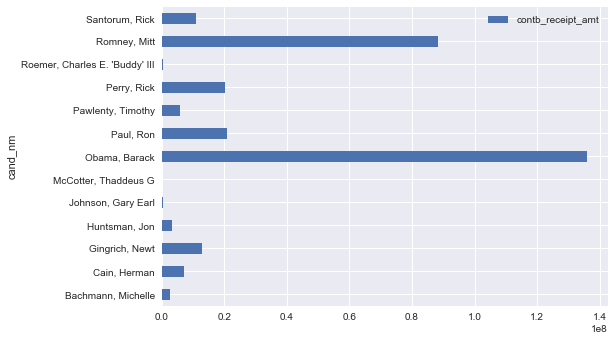

In [483]:

# OBSERVE: Barack Obama and Mitt Romney are the 2 main candidates based on contribution: 
fec.groupby(['cand_nm'])[['contb_receipt_amt']].sum().plot(kind='barh')



`dataframe.isin()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html

In [485]:
# Prepare a subset that just has contributions to the 2 candidates' campaigns

fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]  # Returns a dataframe where isin is true

# CHECK
fec_mrbo.cand_nm.unique()

array(['Romney, Mitt', 'Obama, Barack'], dtype=object)

Donations by occupation is often studied. For exm, lawyers tend to donate more to Democrats while Business execs tend to donate more to Republicans. 

First, total # of donations by occuration:

In [488]:
# count occupations 

fec.contbr_occupation.value_counts().head(10)

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

There is some redundancy in the data such as "INFORMATION REQUESTED" and "INFORMATION REQUESTED FOR BEST EFFORTS". We can clean up a few of them by mapping from one occupation to another. ]

`dataframe.get(x,default)` : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.get.html

`dataframe.map(x)`: Map values of Series using input correspondence (which can be a dict, Series, or function)
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html

In [490]:
occ_mapping = {
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

#if no mapping provided, return x
f = lambda x: occ_mapping.get(x,x)  # get(x, default) returns the values of the dictionary else keep existing values from x
fec.contbr_occupation = fec.contbr_occupation.map(f)  # map values of the column using function f

`sum(iterable, [start])` : Sums start and the items of an iterable from left to right and returns the total. start defaults to 0. The iterable’s items are normally numbers, and the start value is not allowed to be a string.

iterable (list, tuple, dict etc) whose item's sum is to be found. Normally, items of the iterable should be numbers.

In [539]:
# Aggregate the data by party and occupation then filter down to the subset that donated >= $2MM

by_occupation = fec.pivot_table(index=['contbr_occupation'], columns='party', values=['contb_receipt_amt'], aggfunc='sum')

# Filter
over_2mm = by_occupation[by_occupation.sum(1) >= 2000000]  # WHAT DOES 1 MEAN?

over_2mm

contb_receipt_amt              
party                      Democrat    Republican
contbr_occupation                                
ATTORNEY                11141982.97  7.477194e+06
CEO                      2074974.79  4.211041e+06
CONSULTANT               2459912.71  2.544725e+06
ENGINEER                  951525.55  1.818374e+06
EXECUTIVE                1355161.05  4.138850e+06
HOMEMAKER                4248875.80  1.363428e+07
INVESTOR                  884133.00  2.431769e+06
LAWYER                   3160478.87  3.912243e+05
MANAGER                   762883.22  1.444532e+06
NOT PROVIDED             4866973.96  2.056547e+07
OWNER                    1001567.36  2.408287e+06
PHYSICIAN                3735124.94  3.594320e+06
PRESIDENT                1878509.95  4.720924e+06
PROFESSOR                2165071.08  2.967027e+05
REAL ESTATE               528902.09  1.625902e+06
RETIRED                 25305116.38  2.356124e+07
SELF-EMPLOYED             672393.40  1.640253e+06

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, **one or more axes objects can be created**. These axes objects are then used for most plotting actions.

**Figure**

The figure keeps track of all the child Axes, a smattering of ‘special’ artists (titles, figure legends, etc), and the canvas. (Don’t worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of Axes, but to be useful should have at least one.

The Axes (ax) object) is probably the most important class in the matplotlib API, and the one you will be working with most of the time. This is because the Axes is the plotting area into which most of the objects go. The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system. 

**Axes** 

This is what you think of as ‘a plot’, it is the region of the image with the data space (marked as the inner blue box). A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). **Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).**

The Axes class and it’s member functions are the primary entry point to working with the OO interface.

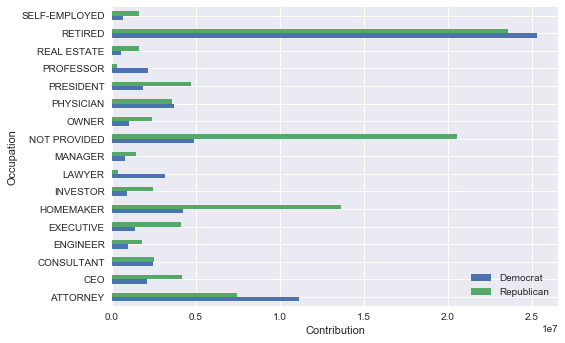

In [579]:
# Visualize the differences using a bar chart

fig, axes = plt.subplots() # need fig
over_2mm.plot(kind='barh', ax=axes)
axes.legend(['Democrat','Republican'])
axes.set_xlabel('Contribution')
axes.set_ylabel('Occupation')

In [652]:
# Let's look at top donor occupations or top companies donating to Obama, Romney. 
# Group by candidate name and use a varient of the top method from earlier

def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)[['contb_receipt_amt']].sum()
    
    # Order totals by key in desc order
    return totals.sort_values(['contb_receipt_amt'], ascending=False)[0:n]

grouped = fec_mrbo.groupby('cand_nm')

# get top contribs by occupation
print grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

# get top contribs by contbr_employer (employers)
print grouped.apply(get_top_amounts,'contbr_employer', n=15)

                                                      contb_receipt_amt
cand_nm       contbr_occupation                                        
Obama, Barack RETIRED                                       25305116.38
              ATTORNEY                                      11141982.97
              INFORMATION REQUESTED                          4866973.96
              HOMEMAKER                                      4248875.80
              PHYSICIAN                                      3735124.94
              LAWYER                                         3160478.87
              CONSULTANT                                     2459912.71
Romney, Mitt  RETIRED                                       11508473.59
              INFORMATION REQUESTED PER BEST EFFORTS        11396894.84
              HOMEMAKER                                      8147446.22
              ATTORNEY                                       5364718.82
              PRESIDENT                                      249

#### Bucketing Donation Amounts

Use `cut` function to discretize the contributor amounts into buckets by contribution size

In [610]:
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])

labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [615]:
# We can group the data for Obama and Romney by name and bin label to get a histogram by donation size

grouped=fec_mrbo.groupby(['cand_nm',labels])

print grouped.size()

# Transform

print grouped.size().unstack(0) # Pivot at level 0 (outer most index)

# OBSERVE: Obama received a significantly larger number of small donations than Romney. 

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
               (10000, 100000]             2
               (100000, 1000000]           3
               (1000000, 10000000]         4
Romney, Mitt   (0, 1]                     77
               (1, 10]                  3681
               (10, 100]               31853
               (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
dtype: int64
cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                       493.0          77.0
(1, 10]                    40070.0        3681.0
(10, 100]                 372280.0       31853.0
(100, 1000]               153991.0       43357.0
(1000, 10000]              2

In [616]:
# Sum contribution amounts and normalize within buckets to visualize percentage of total donations of each size by candidate

bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [625]:
# normalized by dividing each value by total of each column

normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)  # Perform division along the row axis 

normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


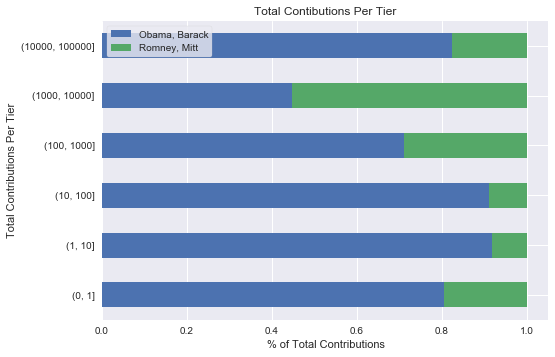

In [636]:
fig, ax = plt.subplots()

normed_sums[:-2].plot(kind='barh', stacked = True, ax=ax)
legend = plt.legend(frameon = 1) # Add shading and frame for legend using frameon
ax.set_xlabel( ' % of Total Contributions')
ax.set_ylabel('Total Contributions Per Tier')
ax.set_title('Total Contibutions Per Tier')

#### Donation Statistics by State

In [718]:
grouped = fec_mrbo.groupby(['cand_nm','contbr_st'])

totals = grouped.contb_receipt_amt.sum()
print totals.head()

cand_nm        contbr_st
Obama, Barack  AA            56405.00
               AB             2048.00
               AE            42973.75
               AK           281840.15
               AL           543123.48
Name: contb_receipt_amt, dtype: float64


In [719]:
totals = totals.unstack(0).fillna(0)

# look at contribution amounts > 100000

totals = totals[totals.sum(1) > 100000]  # Return the sum of the values for the requested axis 1
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [730]:
totals.sum(1)  

#0 = sum the rows
#1 = sum the columns

contbr_st
AK      368044.39
AL     1070426.99
AR      464803.28
AZ     3394913.21
CA    35062620.84
CO     3639143.61
CT     5567766.71
DC     5398676.30
DE      419381.14
FL    15656637.39
GA     4782125.08
HI      906975.64
IA      793366.59
ID      984696.50
IL    20072467.37
IN     1425778.04
KS      774672.44
KY     1381856.91
LA     1539250.14
MA    11359557.55
MD     6466354.33
ME     1284911.96
MI     5018417.12
MN     2038043.46
MO     2692113.61
MS      525380.17
MT      461854.24
NC     3630671.55
NE      429912.47
NH     1041833.96
NJ     6536578.13
NM     1074173.72
NV     1340743.16
NY    24836131.14
OH     3724289.49
OK     1433826.48
OR     1749180.12
PA     5654946.41
PR      245144.00
RI      645245.14
SC     1033475.80
SD      253088.76
TN     2636233.06
TX    12792822.13
UT     4237151.85
VA     7725743.04
VT     1041740.03
WA     5592454.72
WI     1400471.78
WV      295879.59
WY      446642.58
XX      400250.00
dtype: float64

In [768]:
# To get the relative percentage of total donations by state, divde each row by the total contrib amount

percent = totals.div(totals.sum(1), axis=0)

fig,percent[:10]

(<matplotlib.figure.Figure at 0x52198eb8>,
 cand_nm    Obama, Barack  Romney, Mitt
 contbr_st                             
 AK              0.765778      0.234222
 AL              0.507390      0.492610
 AR              0.772902      0.227098
 AZ              0.443745      0.556255
 CA              0.679498      0.320502
 CO              0.585970      0.414030
 CT              0.371476      0.628524
 DC              0.810113      0.189887
 DE              0.802776      0.197224
 FL              0.467417      0.532583)

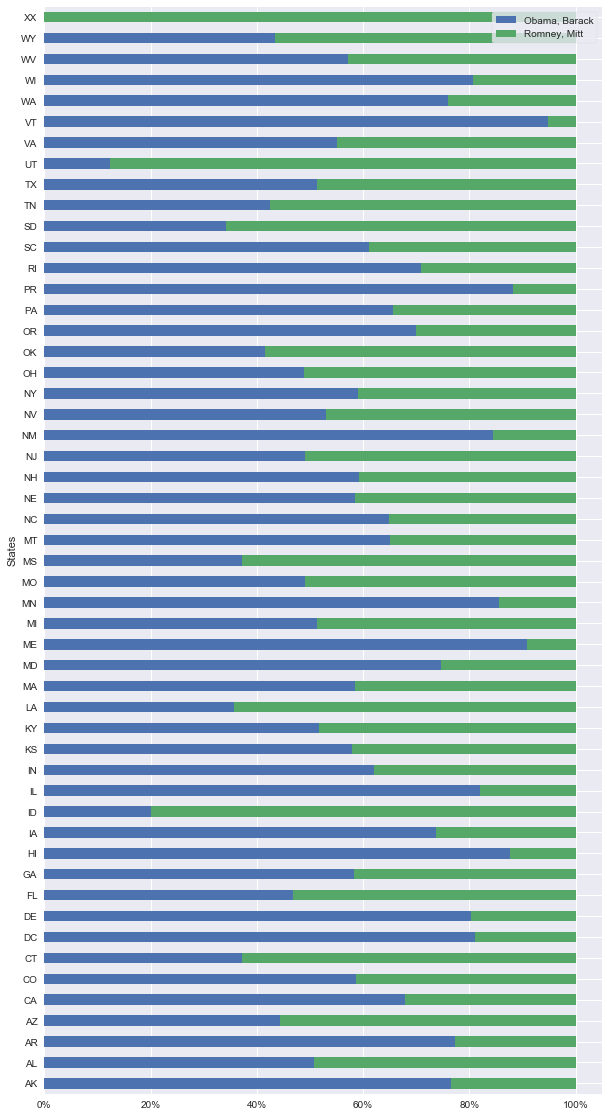

In [754]:


fig, ax = plt.subplots()

percent.plot(kind='barh', stacked=True, figsize=(10,20), ax=ax)
plt.legend(frameon=1)
plt.xticks([0,0.2,0.4,0.6,0.8,1],['0%','20%','40%','60%','80%','100%'])
ax.set_ylabel('States')


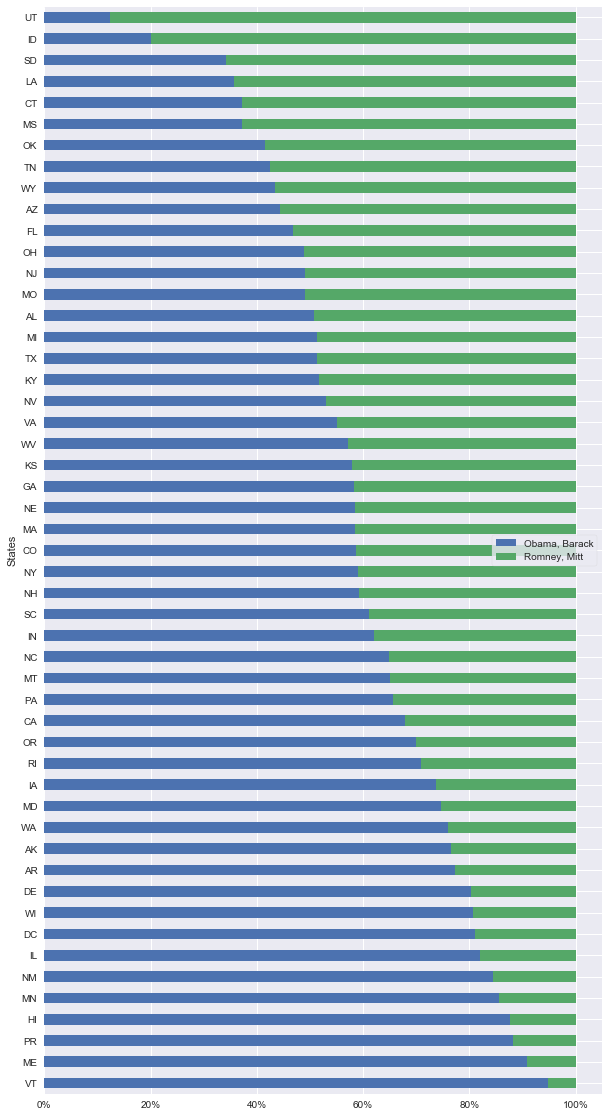

In [769]:

# sort values and remove the xx row
data = percent.sort_values('Obama, Barack', ascending=False)[:-1]

fig, ax = plt.subplots()
data.plot(kind='barh', stacked=True, figsize=(10,20), ax=ax)
plt.legend(frameon=1)
plt.xticks([0,0.2,0.4,0.6,0.8,1],['0%','20%','40%','60%','80%','100%'])
ax.set_ylabel('States')
